# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Cleaning

## 1. Read Data

In [2]:
df = pd.read_csv('movies.csv')
df.head(1)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN


## 2. Understanding the Data

In [3]:
df.shape

(9999, 9)

In [4]:
df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [6]:
def percentage_missing_values(data_frame: pd.DataFrame, columns=False):
    if columns:
        if isinstance(columns, str):
            print((data_frame[columns].isnull().sum()*100/len(data_frame)).round(2))
        if isinstance(columns, list):
            print((data_frame[columns].isnull().sum()*100/len(data_frame)).round(2).sort_values(ascending=False))
    else:
        print((data_frame.isnull().sum()*100/len(data_frame)).round(2).sort_values(ascending=False))

In [7]:
percentage_missing_values(df)

Gross       95.40
RunTime     29.58
RATING      18.20
VOTES       18.20
YEAR         6.44
GENRE        0.80
MOVIES       0.00
ONE-LINE     0.00
STARS        0.00
dtype: float64


In [8]:
df.isnull().sum().round(2).sort_values(ascending=False)

Gross       9539
RunTime     2958
RATING      1820
VOTES       1820
YEAR         644
GENRE         80
MOVIES         0
ONE-LINE       0
STARS          0
dtype: int64

In [9]:
df.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

## 3. Remove Duplicates

In [10]:
duplicates = df[df.duplicated(keep='first')]
print(f'DataFrame has {len(duplicates)} duplicates.')

DataFrame has 431 duplicates.


In [11]:
duplicates['MOVIES'].unique()

array([' Mighty Little Bheem', ' The Pentaverate', ' Bojwagwan',
       ' The Sandman', ' Midnight Mass', ' Russian Doll',
       ' Living Undocumented', ' Scams', ' Stranger Things',
       ' Inventing Anna', ' Disenchantment', ' Brand New Cherry Flavor',
       ' The Witcher', ' One Piece', ' Siempre Bruja', ' On the Verge',
       ' Hyena', ' The Chair', ' Painkiller', ' Buddi',
       ' In from the Cold', ' Clickbait', ' Rádio Coisa Mais Linda',
       ' Cyberpunk: Edgerunners', ' The Witcher: Blood Origin', ' Jaguar',
       ' Vikings: Valhalla', ' Maid', ' Glória', ' Clark',
       ' Power Rangers: Dino Fury', ' Lost Ollie',
       ' Feria: The Darkest Light', ' 800 metros',
       ' Las mágicas historias de Plim Plim', ' The Umbrella Academy',
       ' Stay Close', ' Archive 81', ' Unrecorded Night', ' Caïd',
       ' The Empress', ' Locke & Key', ' Anatomy of a Scandal',
       ' Bir Denizalti Hikayesi', ' Heartstopper',
       ' Post Mortem: No One Dies in Skarnes', ' Sex Educ

In [12]:
df_no_duplicates = df.drop_duplicates(keep='first')
print(f'Before remove duplicates {len(df)}')
print(f'After remove duplicates {len(df_no_duplicates)}')

Before remove duplicates 9999
After remove duplicates 9568


In [13]:
# Check if the duplicates are exist in our cleaned data frame
df_no_duplicates[df_no_duplicates['MOVIES'] == 'Mighty Little Bheem']

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
5161,Mighty Little Bheem,(2019– ),"\nAnimation, Short, Adventure",6.7,\nAn innocent toddler's boundless curiosity - ...,\n,214,6.0,NaN


In [14]:
df_no_duplicates[df_no_duplicates['MOVIES'] == '1899']

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
1378,1899,(2022– ),"\nDrama, History, Horror",NaN,\nMultinational immigrants traveling from the ...,"\n \n Stars:\nAneurin Barnard, \...",NaN,NaN,NaN


## 4. Data Cleaning and Missing Values

In [15]:
def correlation(data_frame: pd.DataFrame, column=False):
    if column:
        if isinstance(column, str):
            print(data_frame[[x for x in data_frame.columns if data_frame[x].dtype != 'object']].corr()[column])
    else:
        print(data_frame[[x for x in data_frame.columns if data_frame[x].dtype != 'object']].corr())

In [16]:
percentage_missing_values(df_no_duplicates)

Gross       95.19
RunTime     26.76
RATING      14.63
VOTES       14.63
YEAR         5.66
GENRE        0.82
MOVIES       0.00
ONE-LINE     0.00
STARS        0.00
dtype: float64


In [17]:
df_no_duplicates.isnull().sum().round(2).sort_values(ascending=False)

Gross       9108
RunTime     2560
RATING      1400
VOTES       1400
YEAR         542
GENRE         78
MOVIES         0
ONE-LINE       0
STARS          0
dtype: int64

In [18]:
cleaned_missing_data_df = df_no_duplicates.copy()

### GENRE

In the dataset, some values in the GENRE column contain unwanted leading or trailing whitespace. This can cause inconsistencies when analyzing or grouping data. To resolve this issue, we use the .str.strip() function to clean the text by removing extra spaces.

In [19]:
cleaned_missing_data_df['GENRE'].unique()

array(['\nAction, Horror, Thriller            ',
       '\nAnimation, Action, Adventure            ',
       '\nDrama, Horror, Thriller            ',
       '\nAnimation, Adventure, Comedy            ',
       '\nAction, Crime, Horror            ',
       '\nAction, Crime, Drama            ',
       '\nDrama, Romance            ',
       '\nCrime, Drama, Mystery            ', '\nComedy            ',
       '\nAction, Adventure, Thriller            ',
       '\nCrime, Drama, Fantasy            ',
       '\nDrama, Horror, Mystery            ',
       '\nComedy, Drama, Romance            ',
       '\nCrime, Drama, Thriller            ', '\nDrama            ',
       '\nComedy, Drama            ',
       '\nDrama, Fantasy, Horror            ',
       '\nComedy, Romance            ',
       '\nAction, Adventure, Drama            ',
       '\nCrime, Drama            ',
       '\nDrama, History, Romance            ',
       '\nHorror, Mystery            ', '\nComedy, Crime            ',
     

In [20]:
cleaned_missing_data_df['GENRE'] = cleaned_missing_data_df['GENRE'].str.strip()
cleaned_missing_data_df['GENRE']

0           Action, Horror, Thriller
1       Animation, Action, Adventure
2            Drama, Horror, Thriller
3       Animation, Adventure, Comedy
4              Action, Crime, Horror
                    ...             
9993                 Drama, Thriller
9995    Animation, Action, Adventure
9996              Documentary, Sport
9997       Adventure, Drama, Fantasy
9998       Adventure, Drama, Fantasy
Name: GENRE, Length: 9568, dtype: object

To ensure data completeness and maintain consistency, we replace missing values with a placeholder "Unknown Genre". This approach helps in retaining all records while preventing potential errors in analysis.

In [21]:
cleaned_missing_data_df['GENRE'].fillna('Unknown', inplace=True)

In [22]:
cleaned_missing_data_df['GENRE'].unique()

array(['Action, Horror, Thriller', 'Animation, Action, Adventure',
       'Drama, Horror, Thriller', 'Animation, Adventure, Comedy',
       'Action, Crime, Horror', 'Action, Crime, Drama', 'Drama, Romance',
       'Crime, Drama, Mystery', 'Comedy', 'Action, Adventure, Thriller',
       'Crime, Drama, Fantasy', 'Drama, Horror, Mystery',
       'Comedy, Drama, Romance', 'Crime, Drama, Thriller', 'Drama',
       'Comedy, Drama', 'Drama, Fantasy, Horror', 'Comedy, Romance',
       'Action, Adventure, Drama', 'Crime, Drama',
       'Drama, History, Romance', 'Horror, Mystery', 'Comedy, Crime',
       'Action, Drama, History', 'Action, Adventure, Crime',
       'Action, Adventure, Fantasy', 'Action, Crime, Mystery',
       'Drama, Fantasy, Romance', 'Drama, Sci-Fi, Thriller',
       'Biography, Drama, History', 'Crime, Thriller',
       'Comedy, Crime, Drama', 'Drama, Mystery, Thriller',
       'Action, Adventure, Mystery', 'Action, Comedy',
       'Crime, Drama, Horror', 'Drama, Mystery, Sc

In [23]:
percentage_missing_values(cleaned_missing_data_df)

Gross       95.19
RunTime     26.76
RATING      14.63
VOTES       14.63
YEAR         5.66
MOVIES       0.00
GENRE        0.00
ONE-LINE     0.00
STARS        0.00
dtype: float64


### YEAR

We are using regex to extract the first occurrence of a 4-digit year.

| YEAR          | YEAR_CLEANED |
|--------------|-------------|
| (2021)       | 2021        |
| (2021– )     | 2021        |
| (2010–2022)  | 2010        |
| (2013– )     | 2013        |
| (I) (2018– ) | 2018        |
| (TV Movie)   | NaN         |
| (2005–2013)  | 2005        |

In [24]:
cleaned_missing_data_df['YEAR'].unique()

array(['(2021)', '(2021– )', '(2010–2022)', '(2013– )', '(2020– )',
       '(2006–2013)', '(2019– )', '(2016–2021)', '(2011– )', '(2005– )',
       '(2008–2013)', '(2017– )', '(2017–2021)', '(2016– )',
       '(1994–2004)', '(2014– )', '(2013–2020)', '(2015– )',
       '(2005–2020)', '(2013–2022)', '(2003– )', '(2009–2020)',
       '(I) (2018– )', '(2010–2015)', '(2011–2019)', '(2015–2020)',
       '(2005–2014)', '(2009–2015)', '(2008–2014)', '(2016–2018)',
       '(2009–2017)', '(2020)', '(2018–2021)', '(2017–2020)',
       '(1987–1994)', '(2018– )', '(2012– )', '(2014–2020)',
       '(2011–2018)', '(2005–2017)', '(2017)', '(2007–2015)',
       '(2000–2007)', '(II) (2007– )', '(1993)', '(1999–2022)',
       '(2015–2018)', '(2014–2019)', '(2016)', '(2012–2020)',
       '(2013–2019)', '(2007–2012)', '(2011–2020)', '(2010–2017)',
       '(2000–2015)', '(2015–2021)', '(2001)', '(1997– )', '(2011–2017)',
       '(1993–1999)', '(1989–1998)', '(2010–2013)', '(2010–2020)',
       '(2003–2019)

In [25]:
cleaned_missing_data_df['YEAR'] = cleaned_missing_data_df['YEAR'].str.extract(r'(\d{4})')
cleaned_missing_data_df['YEAR'].unique()

array(['2021', '2010', '2013', '2020', '2006', '2019', '2016', '2011',
       '2005', '2008', '2017', '1994', '2014', '2015', '2003', '2009',
       '2018', '1987', '2012', '2007', '2000', '1993', '1999', '2001',
       '1997', '1989', '1975', '1995', '1984', '1998', '1966', '1990',
       '2002', '1976', '1978', '2022', '1982', '1968', '2004', '1996',
       '1971', '1980', '1962', '1991', '1960', '1988', '1969', '1961',
       '1979', '1956', '1983', nan, '1986', '1967', '1974', '1992',
       '1958', '1932', '1941', '1950', '1946', '1981', '1952', '1957',
       '1954', '1955', '1948', '1947', '1977', '2023', '1945', '1953',
       '1985', '1973', '1972', '1965', '1944', '1933', '1938'],
      dtype=object)

Convert them to numerical data

In [26]:
cleaned_missing_data_df['YEAR'] = pd.to_numeric(cleaned_missing_data_df['YEAR'], errors='coerce')
cleaned_missing_data_df['YEAR'].dtype

dtype('float64')

In [27]:
cleaned_missing_data_df['YEAR'].head(3)

0    2021.0
1    2021.0
2    2010.0
Name: YEAR, dtype: float64

We will return to filling missing values once we have cleaned all possible columns to ensure the most accurate correlation.

### VOTES

In [28]:
cleaned_missing_data_df['VOTES'].unique()

array(['21,062', '17,870', '885,805', ..., '5,868', '6,873', '911'],
      dtype=object)

Convert them to numerical data

In [29]:
cleaned_missing_data_df['VOTES'] = cleaned_missing_data_df['VOTES'].str.replace(',', '').astype('float')

cleaned_missing_data_df['VOTES'].dtype

dtype('float64')

In [30]:
cleaned_missing_data_df['VOTES']

0        21062.0
1        17870.0
2       885805.0
3       414849.0
4            NaN
          ...   
9993         NaN
9995         NaN
9996         NaN
9997         NaN
9998         NaN
Name: VOTES, Length: 9568, dtype: float64

In [31]:
correlation(cleaned_missing_data_df)

             YEAR    RATING     VOTES   RunTime
YEAR     1.000000 -0.028677 -0.179254 -0.051651
RATING  -0.028677  1.000000  0.103792 -0.223826
VOTES   -0.179254  0.103792  1.000000  0.143464
RunTime -0.051651 -0.223826  0.143464  1.000000


Since none of the variables exhibit a strong correlation, traditional machine learning-based imputation techniques, such as regression models, are not ideal. Instead, we explored alternative approaches.

In [32]:
percentage_missing_values(cleaned_missing_data_df)

Gross       95.19
RunTime     26.76
RATING      14.63
VOTES       14.63
YEAR         6.64
MOVIES       0.00
GENRE        0.00
ONE-LINE     0.00
STARS        0.00
dtype: float64


### YEAR

In [33]:
cleaned_missing_data_df['YEAR'].unique()

array([2021., 2010., 2013., 2020., 2006., 2019., 2016., 2011., 2005.,
       2008., 2017., 1994., 2014., 2015., 2003., 2009., 2018., 1987.,
       2012., 2007., 2000., 1993., 1999., 2001., 1997., 1989., 1975.,
       1995., 1984., 1998., 1966., 1990., 2002., 1976., 1978., 2022.,
       1982., 1968., 2004., 1996., 1971., 1980., 1962., 1991., 1960.,
       1988., 1969., 1961., 1979., 1956., 1983.,   nan, 1986., 1967.,
       1974., 1992., 1958., 1932., 1941., 1950., 1946., 1981., 1952.,
       1957., 1954., 1955., 1948., 1947., 1977., 2023., 1945., 1953.,
       1985., 1973., 1972., 1965., 1944., 1933., 1938.])

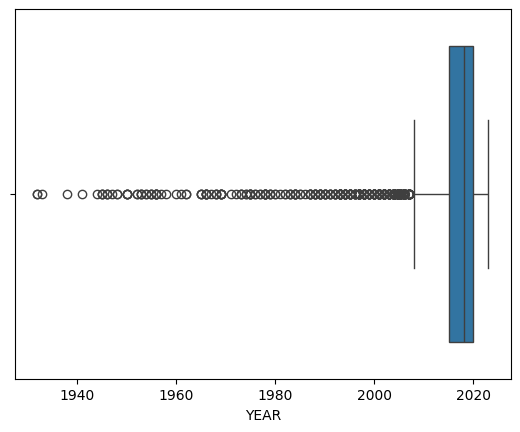

In [34]:
sns.boxplot(x=cleaned_missing_data_df['YEAR'])
plt.show()

In [35]:
def detect_outliers_single_feature(data_frame: pd.DataFrame, column: str) -> list:
    Q1 = np.percentile(data_frame[column].dropna(), 25)  # Drop NaNs to avoid errors
    Q3 = np.percentile(data_frame[column].dropna(), 75)
    IQR = Q3 - Q1

    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outlier indices
    outliers = data_frame[(data_frame[column] < lower_bound) | (data_frame[column] > upper_bound)].index.tolist()

    return outliers

In [36]:
year_outliers = detect_outliers_single_feature(cleaned_missing_data_df, 'YEAR')

In [37]:
len(year_outliers)

706

Since we have detected 706 outliers in the Year column, and some values may be unrealistic (e.g., very old or future years), we will use the Median Year to fill missing values. The median is a better choice than the mean because it is less affected by extreme outliers.

In [38]:
cleaned_missing_data_df['YEAR'] = cleaned_missing_data_df['YEAR'].fillna(cleaned_missing_data_df['YEAR'].median())

In [39]:
cleaned_missing_data_df['YEAR'].unique()

array([2021., 2010., 2013., 2020., 2006., 2019., 2016., 2011., 2005.,
       2008., 2017., 1994., 2014., 2015., 2003., 2009., 2018., 1987.,
       2012., 2007., 2000., 1993., 1999., 2001., 1997., 1989., 1975.,
       1995., 1984., 1998., 1966., 1990., 2002., 1976., 1978., 2022.,
       1982., 1968., 2004., 1996., 1971., 1980., 1962., 1991., 1960.,
       1988., 1969., 1961., 1979., 1956., 1983., 1986., 1967., 1974.,
       1992., 1958., 1932., 1941., 1950., 1946., 1981., 1952., 1957.,
       1954., 1955., 1948., 1947., 1977., 2023., 1945., 1953., 1985.,
       1973., 1972., 1965., 1944., 1933., 1938.])

In [40]:
cleaned_missing_data_df['YEAR'].dtype

dtype('float64')

In [41]:
cleaned_missing_data_df['YEAR'] = cleaned_missing_data_df['YEAR'].astype(int)

In [42]:
cleaned_missing_data_df['YEAR']

0       2021
1       2021
2       2010
3       2013
4       2021
        ... 
9993    2022
9995    2021
9996    2022
9997    2021
9998    2021
Name: YEAR, Length: 9568, dtype: int32

In [43]:
percentage_missing_values(cleaned_missing_data_df)

Gross       95.19
RunTime     26.76
RATING      14.63
VOTES       14.63
MOVIES       0.00
YEAR         0.00
GENRE        0.00
ONE-LINE     0.00
STARS        0.00
dtype: float64


### VOTES

In [44]:
cleaned_missing_data_df['VOTES'].unique()

array([ 21062.,  17870., 885805., ...,   5868.,   6873.,    911.])

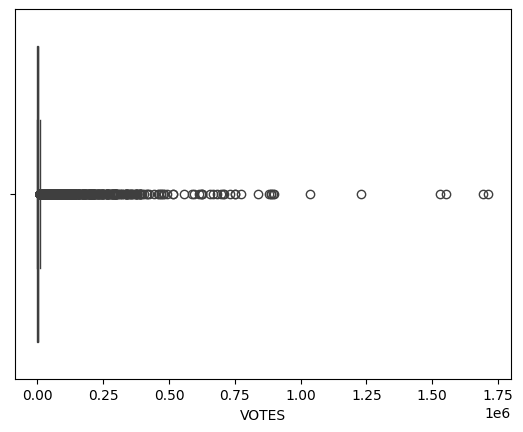

In [45]:
sns.boxplot(x=cleaned_missing_data_df['VOTES'])
plt.show()

In [46]:
votes_outliers = detect_outliers_single_feature(cleaned_missing_data_df, 'VOTES')

In [47]:
len(votes_outliers)

1298

The VOTES column in our dataset represents the number of votes a movie has received. During data preprocessing, we identified:

* 1000+ outliers, indicating extreme variations in vote counts.

Since the VOTES column contains extreme values, we used the Median Imputation method instead of the mean.

In [48]:
cleaned_missing_data_df['VOTES'] = cleaned_missing_data_df['VOTES'].fillna(cleaned_missing_data_df['VOTES'].median())

In [49]:
cleaned_missing_data_df['VOTES'].isna().sum()

0

In [50]:
cleaned_missing_data_df['VOTES'].unique()

array([ 21062.,  17870., 885805., ...,   5868.,   6873.,    911.])

In [51]:
cleaned_missing_data_df['VOTES'] = cleaned_missing_data_df['VOTES'].astype(int)
cleaned_missing_data_df['VOTES']

0        21062
1        17870
2       885805
3       414849
4          792
         ...  
9993       792
9995       792
9996       792
9997       792
9998       792
Name: VOTES, Length: 9568, dtype: int32

In [52]:
percentage_missing_values(cleaned_missing_data_df)

Gross       95.19
RunTime     26.76
RATING      14.63
MOVIES       0.00
YEAR         0.00
GENRE        0.00
ONE-LINE     0.00
STARS        0.00
VOTES        0.00
dtype: float64


### RATING

In [53]:
cleaned_missing_data_df['RATING'].unique()

array([6.1, 5. , 8.2, 9.2, nan, 7.6, 6.8, 8.6, 7.9, 7.4, 6. , 8.1, 6.2,
       5.4, 8. , 7.5, 9.4, 8.3, 8.7, 8.9, 8.8, 8.5, 8.4, 6.7, 7.7, 9. ,
       5.8, 3.3, 7.8, 5.7, 6.6, 6.9, 6.5, 7.1, 5.6, 7.3, 9.1, 7.2, 6.4,
       9.3, 7. , 6.3, 3.7, 5.5, 4.6, 4.8, 5.3, 4.7, 5.9, 5.1, 4.9, 2.7,
       4.4, 3.1, 4.5, 4.2, 3.8, 5.2, 2.8, 3.5, 4.3, 3.2, 1.1, 3.9, 4. ,
       3.4, 2.6, 3.6, 3. , 2.5, 2.2, 2.9, 4.1, 2.1, 2. , 2.3, 2.4, 1.8,
       9.6, 9.5, 9.7, 9.9, 9.8])

In [54]:
cleaned_missing_data_df['RATING'].dtype

dtype('float64')

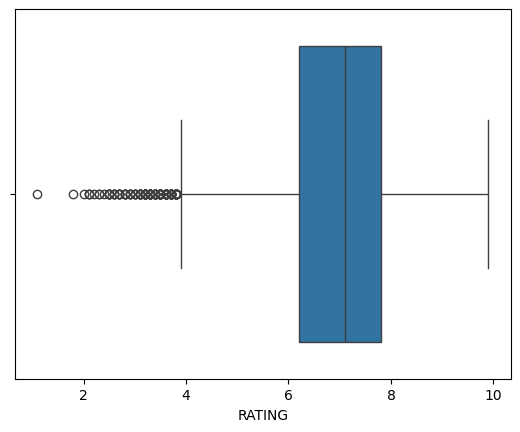

In [55]:
sns.boxplot(x=cleaned_missing_data_df['RATING'])
plt.show()

In [56]:
rating_outliers = detect_outliers_single_feature(cleaned_missing_data_df, 'RATING')

In [57]:
len(rating_outliers)

165

We will use the median again since we have outliers once more.

In [58]:
cleaned_missing_data_df['RATING'] = cleaned_missing_data_df['RATING'].fillna(cleaned_missing_data_df['RATING'].median())

In [59]:
cleaned_missing_data_df['RATING'].unique()

array([6.1, 5. , 8.2, 9.2, 7.1, 7.6, 6.8, 8.6, 7.9, 7.4, 6. , 8.1, 6.2,
       5.4, 8. , 7.5, 9.4, 8.3, 8.7, 8.9, 8.8, 8.5, 8.4, 6.7, 7.7, 9. ,
       5.8, 3.3, 7.8, 5.7, 6.6, 6.9, 6.5, 5.6, 7.3, 9.1, 7.2, 6.4, 9.3,
       7. , 6.3, 3.7, 5.5, 4.6, 4.8, 5.3, 4.7, 5.9, 5.1, 4.9, 2.7, 4.4,
       3.1, 4.5, 4.2, 3.8, 5.2, 2.8, 3.5, 4.3, 3.2, 1.1, 3.9, 4. , 3.4,
       2.6, 3.6, 3. , 2.5, 2.2, 2.9, 4.1, 2.1, 2. , 2.3, 2.4, 1.8, 9.6,
       9.5, 9.7, 9.9, 9.8])

In [60]:
cleaned_missing_data_df['RATING'].dtype

dtype('float64')

In [61]:
percentage_missing_values(cleaned_missing_data_df)

Gross       95.19
RunTime     26.76
MOVIES       0.00
YEAR         0.00
GENRE        0.00
RATING       0.00
ONE-LINE     0.00
STARS        0.00
VOTES        0.00
dtype: float64


### RunTime

In [62]:
cleaned_missing_data_df['RunTime'].unique()

array([121.,  25.,  44.,  23.,  nan,  50., 110.,  53.,  30., 114.,  42.,
       107.,  60.,  41.,  49.,  51., 109.,  22.,  43., 136.,  46.,  45.,
        58.,  24.,  70.,  64., 148., 395., 101.,  95.,  32., 118.,  47.,
        31., 104., 127.,  54.,  92.,  88.,  59.,  55., 178.,  16.,  48.,
        99., 124., 151., 100.,  40., 149., 119.,  20.,  87., 111.,  91.,
       117., 135., 129., 113.,  15.,  85., 169.,  97., 116., 138., 137.,
       209., 201., 123.,  96., 572., 467., 140.,  56., 112., 125., 145.,
       128., 147.,  90.,  98.,  26., 115., 156., 179., 108.,  34.,  11.,
       152.,  94., 133., 298.,  28., 126., 102., 106., 385., 122., 452.,
       120., 494., 240., 134.,  80.,  89.,  35., 216., 296., 143., 164.,
       386., 363., 150., 105., 131.,  65., 103.,  86.,  52., 356., 154.,
       130., 491., 132.,  93.,  82., 370.,  18., 228.,  84., 280.,  78.,
       316., 264.,  83.,  81., 270., 197., 347., 267.,  37., 230., 233.,
        21., 220., 331.,  39.,   9., 281.,  10., 55

In [63]:
cleaned_missing_data_df['RunTime'].dtype

dtype('float64')

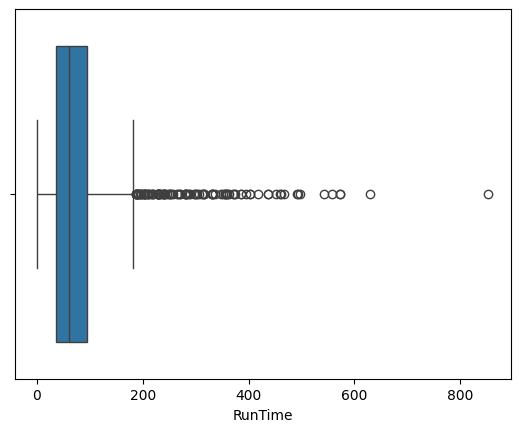

In [64]:
sns.boxplot(x=cleaned_missing_data_df['RunTime'])
plt.show()

In [65]:
runtime_outliers = detect_outliers_single_feature(cleaned_missing_data_df, 'RunTime')

In [66]:
len(runtime_outliers)

105

We will use the median again since we have outliers once more.

In [67]:
cleaned_missing_data_df['RunTime'] = cleaned_missing_data_df['RunTime'].fillna(cleaned_missing_data_df['RunTime'].median())

In [68]:
cleaned_missing_data_df['RunTime'].unique()

array([121.,  25.,  44.,  23.,  60.,  50., 110.,  53.,  30., 114.,  42.,
       107.,  41.,  49.,  51., 109.,  22.,  43., 136.,  46.,  45.,  58.,
        24.,  70.,  64., 148., 395., 101.,  95.,  32., 118.,  47.,  31.,
       104., 127.,  54.,  92.,  88.,  59.,  55., 178.,  16.,  48.,  99.,
       124., 151., 100.,  40., 149., 119.,  20.,  87., 111.,  91., 117.,
       135., 129., 113.,  15.,  85., 169.,  97., 116., 138., 137., 209.,
       201., 123.,  96., 572., 467., 140.,  56., 112., 125., 145., 128.,
       147.,  90.,  98.,  26., 115., 156., 179., 108.,  34.,  11., 152.,
        94., 133., 298.,  28., 126., 102., 106., 385., 122., 452., 120.,
       494., 240., 134.,  80.,  89.,  35., 216., 296., 143., 164., 386.,
       363., 150., 105., 131.,  65., 103.,  86.,  52., 356., 154., 130.,
       491., 132.,  93.,  82., 370.,  18., 228.,  84., 280.,  78., 316.,
       264.,  83.,  81., 270., 197., 347., 267.,  37., 230., 233.,  21.,
       220., 331.,  39.,   9., 281.,  10., 557.,  3

In [69]:
cleaned_missing_data_df['RunTime'] = cleaned_missing_data_df['RunTime'].astype(int)

In [70]:
cleaned_missing_data_df['RunTime'].unique()

array([121,  25,  44,  23,  60,  50, 110,  53,  30, 114,  42, 107,  41,
        49,  51, 109,  22,  43, 136,  46,  45,  58,  24,  70,  64, 148,
       395, 101,  95,  32, 118,  47,  31, 104, 127,  54,  92,  88,  59,
        55, 178,  16,  48,  99, 124, 151, 100,  40, 149, 119,  20,  87,
       111,  91, 117, 135, 129, 113,  15,  85, 169,  97, 116, 138, 137,
       209, 201, 123,  96, 572, 467, 140,  56, 112, 125, 145, 128, 147,
        90,  98,  26, 115, 156, 179, 108,  34,  11, 152,  94, 133, 298,
        28, 126, 102, 106, 385, 122, 452, 120, 494, 240, 134,  80,  89,
        35, 216, 296, 143, 164, 386, 363, 150, 105, 131,  65, 103,  86,
        52, 356, 154, 130, 491, 132,  93,  82, 370,  18, 228,  84, 280,
        78, 316, 264,  83,  81, 270, 197, 347, 267,  37, 230, 233,  21,
       220, 331,  39,   9, 281,  10, 557,  33, 461, 460,  27, 231, 189,
       360, 498, 187,  75, 629, 144, 542, 258, 239, 312, 158, 229, 403,
        57, 142, 313, 306, 358, 139, 300, 436, 374, 203, 160,  2

In [71]:
cleaned_missing_data_df['RunTime'].dtype

dtype('int32')

In [72]:
percentage_missing_values(cleaned_missing_data_df)

Gross       95.19
MOVIES       0.00
YEAR         0.00
GENRE        0.00
RATING       0.00
ONE-LINE     0.00
STARS        0.00
VOTES        0.00
RunTime      0.00
dtype: float64


### Gross

In [73]:
cleaned_missing_data_df['Gross'].unique()

array([nan, '$75.47M', '$402.45M', '$89.22M', '$315.54M', '$57.01M',
       '$260.00M', '$132.38M', '$167.77M', '$404.52M', '$15.07M',
       '$70.10M', '$210.61M', '$327.48M', '$390.53M', '$303.00M',
       '$56.63M', '$58.06M', '$353.01M', '$46.89M', '$7.00M', '$377.85M',
       '$107.83M', '$403.71M', '$316.83M', '$100.55M', '$28.26M',
       '$188.76M', '$213.52M', '$226.01M', '$408.08M', '$10.06M',
       '$14.84M', '$168.05M', '$183.64M', '$342.55M', '$96.52M',
       '$140.22M', '$172.56M', '$56.95M', '$330.36M', '$17.80M', '$0.20M',
       '$56.82M', '$66.21M', '$75.61M', '$4.56M', '$106.58M', '$5.02M',
       '$22.68M', '$102.92M', '$110.52M', '$504.01M', '$26.86M', '$2.00M',
       '$32.73M', '$33.80M', '$400.74M', '$19.02M', '$36.26M', '$6.67M',
       '$45.51M', '$75.66M', '$0.33M', '$4.00M', '$20.16M', '$95.86M',
       '$176.48M', '$126.66M', '$80.10M', '$42.34M', '$0.04M', '$4.71M',
       '$117.72M', '$229.09M', '$33.70M', '$97.69M', '$21.15M', '$27.85M',
       '$25.02

In [74]:
def transform_gross_column(value):
    if pd.isna(value):
        return np.nan
    value = value.replace('$', '').replace(',', '')
    if 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    return float(value)

In [75]:
cleaned_missing_data_df['Gross'] = cleaned_missing_data_df['Gross'].apply(transform_gross_column)

In [76]:
cleaned_missing_data_df['Gross'].unique()

array([       nan, 7.5470e+07, 4.0245e+08, 8.9220e+07, 3.1554e+08,
       5.7010e+07, 2.6000e+08, 1.3238e+08, 1.6777e+08, 4.0452e+08,
       1.5070e+07, 7.0100e+07, 2.1061e+08, 3.2748e+08, 3.9053e+08,
       3.0300e+08, 5.6630e+07, 5.8060e+07, 3.5301e+08, 4.6890e+07,
       7.0000e+06, 3.7785e+08, 1.0783e+08, 4.0371e+08, 3.1683e+08,
       1.0055e+08, 2.8260e+07, 1.8876e+08, 2.1352e+08, 2.2601e+08,
       4.0808e+08, 1.0060e+07, 1.4840e+07, 1.6805e+08, 1.8364e+08,
       3.4255e+08, 9.6520e+07, 1.4022e+08, 1.7256e+08, 5.6950e+07,
       3.3036e+08, 1.7800e+07, 2.0000e+05, 5.6820e+07, 6.6210e+07,
       7.5610e+07, 4.5600e+06, 1.0658e+08, 5.0200e+06, 2.2680e+07,
       1.0292e+08, 1.1052e+08, 5.0401e+08, 2.6860e+07, 2.0000e+06,
       3.2730e+07, 3.3800e+07, 4.0074e+08, 1.9020e+07, 3.6260e+07,
       6.6700e+06, 4.5510e+07, 7.5660e+07, 3.3000e+05, 4.0000e+06,
       2.0160e+07, 9.5860e+07, 1.7648e+08, 1.2666e+08, 8.0100e+07,
       4.2340e+07, 4.0000e+04, 4.7100e+06, 1.1772e+08, 2.2909e

In [77]:
cleaned_missing_data_df['Gross'].dtype

dtype('float64')

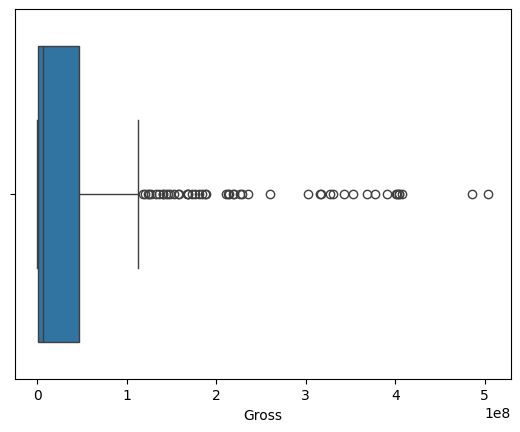

In [78]:
sns.boxplot(x=cleaned_missing_data_df['Gross'])
plt.show()

In [79]:
gross_outliers = detect_outliers_single_feature(cleaned_missing_data_df, 'Gross')

In [80]:
len(gross_outliers)

50

In [81]:
cleaned_missing_data_df['Gross'] = cleaned_missing_data_df['Gross'].fillna(cleaned_missing_data_df['Gross'].median())

In [82]:
cleaned_missing_data_df['Gross'].unique()

array([6.1450e+06, 7.5470e+07, 4.0245e+08, 8.9220e+07, 3.1554e+08,
       5.7010e+07, 2.6000e+08, 1.3238e+08, 1.6777e+08, 4.0452e+08,
       1.5070e+07, 7.0100e+07, 2.1061e+08, 3.2748e+08, 3.9053e+08,
       3.0300e+08, 5.6630e+07, 5.8060e+07, 3.5301e+08, 4.6890e+07,
       7.0000e+06, 3.7785e+08, 1.0783e+08, 4.0371e+08, 3.1683e+08,
       1.0055e+08, 2.8260e+07, 1.8876e+08, 2.1352e+08, 2.2601e+08,
       4.0808e+08, 1.0060e+07, 1.4840e+07, 1.6805e+08, 1.8364e+08,
       3.4255e+08, 9.6520e+07, 1.4022e+08, 1.7256e+08, 5.6950e+07,
       3.3036e+08, 1.7800e+07, 2.0000e+05, 5.6820e+07, 6.6210e+07,
       7.5610e+07, 4.5600e+06, 1.0658e+08, 5.0200e+06, 2.2680e+07,
       1.0292e+08, 1.1052e+08, 5.0401e+08, 2.6860e+07, 2.0000e+06,
       3.2730e+07, 3.3800e+07, 4.0074e+08, 1.9020e+07, 3.6260e+07,
       6.6700e+06, 4.5510e+07, 7.5660e+07, 3.3000e+05, 4.0000e+06,
       2.0160e+07, 9.5860e+07, 1.7648e+08, 1.2666e+08, 8.0100e+07,
       4.2340e+07, 4.0000e+04, 4.7100e+06, 1.1772e+08, 2.2909e

In [83]:
cleaned_missing_data_df['Gross'] = cleaned_missing_data_df['Gross'].astype(int)

In [84]:
cleaned_missing_data_df['Gross'].dtype

dtype('int32')

In [85]:
percentage_missing_values(cleaned_missing_data_df)

MOVIES      0.0
YEAR        0.0
GENRE       0.0
RATING      0.0
ONE-LINE    0.0
STARS       0.0
VOTES       0.0
RunTime     0.0
Gross       0.0
dtype: float64


## 5. Standardize Data Formats

In [86]:
standardize_df = cleaned_missing_data_df.copy()

In [87]:
standardize_df.head(1)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121,6145000


### ONE-LINE

In [88]:
standardize_df['ONE-LINE'].unique()

array(['\nA woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.',
       '\nThe war for Eternia begins again in what may be the final battle between He-Man and Skeletor. A new animated series from writer-director Kevin Smith.',
       '\nSheriff Deputy Rick Grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive.',
       ...,
       "\nLenore urges Hector to not test Camilla's patience. Belmont and Sypha cross paths with Zamfir, a fearsome guard with a suspicious mind.",
       '\nActor Brian Tyree Henry ("Godzilla vs. Kong", "Atlanta", "The Woman in the Window"); guest co-hosts Jerry O\'Connell and Justin Baldoni;',
       "\nAs Paxton's mixed messages have Devi questioning herself, the upcoming winter dance offers a chance to determine where she stands- and what she needs."],
      dtype=object)

In [89]:
standardize_df['ONE-LINE'] = standardize_df['ONE-LINE'].str.strip()
standardize_df['ONE-LINE'].unique()

array(['A woman with a mysterious illness is forced into action when a group of terrorists attempt to hijack a transatlantic overnight flight.',
       'The war for Eternia begins again in what may be the final battle between He-Man and Skeletor. A new animated series from writer-director Kevin Smith.',
       'Sheriff Deputy Rick Grimes wakes up from a coma to learn the world is in ruins and must lead a group of survivors to stay alive.',
       ...,
       "Lenore urges Hector to not test Camilla's patience. Belmont and Sypha cross paths with Zamfir, a fearsome guard with a suspicious mind.",
       'Actor Brian Tyree Henry ("Godzilla vs. Kong", "Atlanta", "The Woman in the Window"); guest co-hosts Jerry O\'Connell and Justin Baldoni;',
       "As Paxton's mixed messages have Devi questioning herself, the upcoming winter dance offers a chance to determine where she stands- and what she needs."],
      dtype=object)

In [90]:
standardize_df.head(1)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121,6145000


### STARS

The STARS column in our dataset contains both director and star information for each movie. However, not all records have director information, and some records contain both directors and stars. To facilitate better analysis and separate the two features, we extracted the Director and Stars into individual columns.

In [91]:
standardize_df['STARS'][:10]

0    \n    Director:\nPeter Thorwarth\n| \n    Star...
1    \n            \n    Stars:\nChris Wood, \nSara...
2    \n            \n    Stars:\nAndrew Lincoln, \n...
3    \n            \n    Stars:\nJustin Roiland, \n...
4    \n    Director:\nMatthias Schweighöfer\n| \n  ...
5    \n            \n    Stars:\nChase Stokes, \nMa...
6    \n    Director:\nAugustine Frizzell\n| \n    S...
7    \n            \n    Stars:\nMichael C. Hall, \...
8    \n            \n    Stars:\nMaitreyi Ramakrish...
9    \n            \n    Stars:\nAlexandra Breckenr...
Name: STARS, dtype: object

In [92]:
def director_column(value):
    if 'Director' in value:
        return value.split('\n| \n')[0].split('\n')[2]
    else:
        return 'Unknown'


In [93]:
standardize_df['DIRECTOR'] = standardize_df['STARS'].apply(director_column)

In [94]:
standardize_df['DIRECTOR'][:10]

0          Peter Thorwarth
1                  Unknown
2                  Unknown
3                  Unknown
4    Matthias Schweighöfer
5                  Unknown
6       Augustine Frizzell
7                  Unknown
8                  Unknown
9                  Unknown
Name: DIRECTOR, dtype: object

In [95]:
standardize_df['STARS'][2]

'\n            \n    Stars:\nAndrew Lincoln, \nNorman Reedus, \nMelissa McBride, \nLauren Cohan\n'

In [96]:
def stars_column(value):
    if 'Stars' in value:
        return value.split('Stars:\n')[1].replace('\n', '')
    else:
        return 'Unknown'

In [97]:
standardize_df['STARS'] = standardize_df['STARS'].apply(stars_column)

In [98]:
standardize_df["STARS"][2]

'Andrew Lincoln, Norman Reedus, Melissa McBride, Lauren Cohan'

In [99]:
standardize_df.head(3)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,DIRECTOR
0,Blood Red Sky,2021,"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",21062,121,6145000,Peter Thorwarth
1,Masters of the Universe: Revelation,2021,"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",17870,25,6145000,Unknown
2,The Walking Dead,2010,"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...",885805,44,6145000,Unknown


### 6. Column Names

In [100]:
column_name_change_df = standardize_df.copy()

In [101]:
column_name_change_df.columns = column_name_change_df.columns.str.lower().str.strip().str.replace('-', '_')

In [102]:
column_name_change_df.columns

Index(['movies', 'year', 'genre', 'rating', 'one_line', 'stars', 'votes',
       'runtime', 'gross', 'director'],
      dtype='object')

In [103]:
finished_df = column_name_change_df[['movies', 'year', 'director', 'genre', 'rating', 'votes', 'runtime', 'gross', 'stars', 'one_line']]

In [104]:
finished_df

,movies,year,director,genre,rating,votes,runtime,gross,stars,one_line
0,Blood Red Sky,2021,Peter Thorwarth,"Action, Horror, Thriller",6.1,21062,121,6145000,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",A woman with a mysterious illness is forced in...
1,Masters of the Universe: Revelation,2021,Unknown,"Animation, Action, Adventure",5.0,17870,25,6145000,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",The war for Eternia begins again in what may b...
2,The Walking Dead,2010,Unknown,"Drama, Horror, Thriller",8.2,885805,44,6145000,"Andrew Lincoln, Norman Reedus, Melissa McBride...",Sheriff Deputy Rick Grimes wakes up from a com...
3,Rick and Morty,2013,Unknown,"Animation, Adventure, Comedy",9.2,414849,23,6145000,"Justin Roiland, Chris Parnell, Spencer Grammer...",An animated series that follows the exploits o...
4,Army of Thieves,2021,Matthias Schweighöfer,"Action, Crime, Horror",7.1,792,60,6145000,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...","A prequel, set before the events of Army of th..."
...,...,...,...,...,...,...,...,...,...,...
9993,Totenfrau,2022,Nicolai Rohde,"Drama, Thriller",7.1,792,60,6145000,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",Add a Plot
9995,Arcane,2021,Unknown,"Animation, Action, Adventure",7.1,792,60,6145000,Unknown,Add a Plot
9996,Heart of Invictus,2022,Orlando von Einsiedel,"Documentary, Sport",7.1,792,60,6145000,Unknown,Add a Plot
9997,The Imperfects,2021,Jovanka Vuckovic,"Adventure, Drama, Fantasy",7.1,792,60,6145000,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",Add a Plot


In [105]:
finished_df['one_line'] = finished_df['one_line'].apply(lambda x: 'Unknown' if x.strip() == 'Add a Plot' else x)

In [106]:
finished_df = finished_df.reset_index(drop=True)

In [107]:
finished_df.sort_values(by='year', ascending=False)

,movies,year,director,genre,rating,votes,runtime,gross,stars,one_line
9351,Astérix,2023,Unknown,"Animation, Action, Adventure",7.1,792,60,6145000,Unknown,Unknown
3315,The Monkey King,2023,Anthony Stacchi,"Animation, Action, Adventure",7.1,792,60,6145000,"BD Wong, Hoon Lee, Jimmy O. Yang, Bowen Yang",An animated version of the mythical Chinese hero.
1944,The Mother,2022,Niki Caro,"Action, Thriller",7.1,792,60,6145000,Unknown,Female-led action thriller.
4145,Surviving Summer,2022,Unknown,Drama,7.1,792,60,6145000,"Sky Katz, Kai Lewins, Savannah La Rain, Joao M...",Rebellious Brooklyn teen Summer Torres is sent...
5462,Escape from Hat,2022,Mark Osborne,"Animation, Adventure, Comedy",7.1,792,60,6145000,Unknown,A desperate rabbit rallies an unexpected band ...
...,...,...,...,...,...,...,...,...,...,...
1373,Dumbo,1941,"Samuel Armstrong,","Animation, Adventure, Drama",7.2,124409,64,1600000,"Sterling Holloway, Edward Brophy, Herman Bing,...","Ridiculed because of his enormous ears, a youn..."
6089,Karriär,1938,Schamyl Bauman,Drama,5.2,52,106,6145000,"Signe Hasso, Sture Lagerwall, Tollie Zellman, ...",A traveling theater company in Sweden. Conflic...
5915,Kära släkten,1933,Gustaf Molander,Comedy,5.4,36,94,6145000,"Gösta Ekman, Tutta Rolf, Carl Barcklind, Thor ...",The story about a Stockholm wholesaler and his...
5213,Söderkåkar,1932,Weyler Hildebrand,Comedy,5.3,59,87,6145000,"Gideon Wahlberg, Dagmar Ebbesen, Björn Berglun...",The movie version of Gideon Wahlbergs comedy a...


## 7. Outliers

In [109]:
from collections import Counter

def delete_outliers(data_frame: pd.DataFrame, n: int, features: list) -> list:
    """
    Detect and Identifies outliers in the specified features of a 
    DataFrame.

    This function iterates through a list of numerical features and detects
    outliers in each feature based on the IQR method. An outlier is defined
    as a value below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
    If an index appears as an outlier in more than N features, it is added to the 
    final list of multiple outliers.

    Parameters:
    ---------------
    data_frame: pd.DataFrame
        The DataFrame containing the data to analyze.

    n: int
        The minimum number of features in which a data point must be an outlier
        to be considered a multiple outlier.

    features: list
        A list of column names (features) to analyze for outliers.
        Those should be numerical columns.

    Returns:
    -------------
    list
        A list of indices corresponding to data points that are outliers
        in more than n features.

    Raises:
    ------------
    TypeError
        If data_frame is not a pandas DataFrame, or if features is not a list.

    ValueError
        If n is negative, or if a feature in the features list is not in
        the DataFrame.
    """
    if not isinstance(data_frame, pd.DataFrame):
        raise TypeError("`data_frame` must be a pandas DataFrame.")
    if not isinstance(features, list):
        raise TypeError("`features` must be a list of column names.")
    if not isinstance(n, int) or n < 0:
        raise ValueError("`n` must be a non-negative integer.")
        
    outliers = []
    for feature in features:
        Q1 = np.percentile(data_frame[feature], 25)
        Q3 = np.percentile(data_frame[feature], 75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR

        outlier_list = data_frame[(data_frame[feature] < lower) | (data_frame[feature] > upper)].index
        outliers.extend(outlier_list)
    outliers = Counter(outliers)
    multiple_outliers = list(key for key, value in outliers.items() if value > n)
    return multiple_outliers

In [110]:
outliers = delete_outliers(finished_df, 2, [x for x in finished_df.columns if finished_df[x].dtype != 'object'])

In [112]:
len(outliers)

126

In [113]:
finished_df = finished_df.drop(outliers, axis=0).reset_index(drop=True)

In [114]:
finished_df

,movies,year,director,genre,rating,votes,runtime,gross,stars,one_line
0,Blood Red Sky,2021,Peter Thorwarth,"Action, Horror, Thriller",6.1,21062,121,6145000,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",A woman with a mysterious illness is forced in...
1,Masters of the Universe: Revelation,2021,Unknown,"Animation, Action, Adventure",5.0,17870,25,6145000,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",The war for Eternia begins again in what may b...
2,The Walking Dead,2010,Unknown,"Drama, Horror, Thriller",8.2,885805,44,6145000,"Andrew Lincoln, Norman Reedus, Melissa McBride...",Sheriff Deputy Rick Grimes wakes up from a com...
3,Rick and Morty,2013,Unknown,"Animation, Adventure, Comedy",9.2,414849,23,6145000,"Justin Roiland, Chris Parnell, Spencer Grammer...",An animated series that follows the exploits o...
4,Army of Thieves,2021,Matthias Schweighöfer,"Action, Crime, Horror",7.1,792,60,6145000,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby...","A prequel, set before the events of Army of th..."
...,...,...,...,...,...,...,...,...,...,...
9437,Totenfrau,2022,Nicolai Rohde,"Drama, Thriller",7.1,792,60,6145000,"Felix Klare, Romina Küper, Anna Maria Mühe, Ro...",Unknown
9438,Arcane,2021,Unknown,"Animation, Action, Adventure",7.1,792,60,6145000,Unknown,Unknown
9439,Heart of Invictus,2022,Orlando von Einsiedel,"Documentary, Sport",7.1,792,60,6145000,Unknown,Unknown
9440,The Imperfects,2021,Jovanka Vuckovic,"Adventure, Drama, Fantasy",7.1,792,60,6145000,"Morgan Taylor Campbell, Iñaki Godoy, Rhianna J...",Unknown


In [116]:
finished_df.shape

(9442, 10)